In [2]:
import pandas as pd

rotten_tom_df = pd.read_csv('rotten_tomatoes_movies_matched.csv')
budgets_df = pd.read_csv('movie_budgets.csv')

In [23]:
joined_df = rotten_tom_df.set_index('movie_title_budget').join(budgets_df.set_index('Movie'))

In [33]:
import collections
from fuzzywuzzy import fuzz

seen_rows = dict()
distinct_df = pd.DataFrame(columns=joined_df.columns)

for index, row in joined_df.iterrows():
    print(index)
    ratio = fuzz.ratio(index.lower(), row['movie_title'].lower())
    if index in seen_rows:
        if ratio > seen_rows[index] and ratio > 90:
            seen_rows[index] = ratio
            distinct_df.loc[index] = row
    elif ratio > 90:
        distinct_df.loc[index] = row
        seen_rows[index] = ratio

distinct_df

rst
Things We Lost in the Fire
Things We Lost in the Fire
Things to Do in Denver when You're Dead
Things to Do in Denver when You're Dead
Things to Do in Denver when You're Dead
Think Like a Man
Think Like a Man Too
Thinner
Thinner
Thinner
Thinner
Thirteen
Thirteen Conversations About One Thing
Thirteen Conversations About One Thing
Thirteen Conversations About One Thing
Thirteen Days
Thirteen Ghosts
This Christmas
This Christmas
This Christmas
This Is Martin Bonner
This Means War
This Means War
This Thing of Ours
This is 40
This is 40
This is England
This is England
This is England
This is England
This is England
This is Where I Leave You
This is Where I Leave You
This is the End
This is the End
This is the End
This is the End
Thomas and the Magic Railroad
Thomas and the Magic Railroad
Thor
Thor
Thor: Ragnarok
Thor: Ragnarok
Thor: The Dark World
Thor: The Dark World
Thor: The Dark World
Thoroughbreds
Thr3e
Three Billboards Outside Ebbing, Missouri
Three Kings
Three Kings
Three Kings
T

,Unnamed: 0,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,poster_image_url,rating,genre,directors,writers,...,audience_count,audience_top_critics_count,audience_fresh_critics_count,audience_rotten_critics_count,ratio,,ReleaseDate,ProductionBudget,DomesticGross,WorldwideGross
#Horror,7451,/m/horror_2015,#Horror,You've got followers... Cyberbullying goes off...,NaN,https://resizing.flixster.com/MlaIaxV_KPd6EacB...,NR,Horror,Tara Subkoff,Tara Subkoff,...,507.0,5,6,6,100,"5,176","Nov 20, 2015","$1,500,000",$0,$0
(500) Days of Summer,1946,/m/500_days_of_summer,500 Days of Summer,Joseph Gordon-Levitt and Zooey Deschanel star ...,"A clever, offbeat romantic comedy, 500 Days of...",https://resizing.flixster.com/UtHppCPax7MLWu9M...,PG-13,"Comedy, Drama, Romance",Marc Webb,"Scott Neustadter, Michael H. Weber",...,396859.0,51,195,34,95,"4,005","Jul 17, 2009","$7,500,000","$32,425,665","$34,439,060"
10 Cloverfield Lane,1265,/m/10_cloverfield_lane,10 Cloverfield Lane,A young woman wakes up after a terrible accide...,"Smart, solidly crafted, and palpably tense, 10...",https://resizing.flixster.com/ldul3JFV_XQOeP-0...,PG-13,"Drama, Mystery & Suspense, Science Fiction & F...",Dan Trachtenberg,"Josh Campbell, Matthew Stuecken, Damien Chazelle",...,60607.0,49,271,30,100,"3,042","Jan 4, 2016","$15,000,000","$72,082,999","$108,286,422"
10 Things I Hate About You,1269,/m/10_things_i_hate_about_you,10 Things I Hate About You,"Popular, pretty Bianca Stratford (Larisa Oleyn...",Julia Stiles and Heath Ledger add strong perfo...,https://resizing.flixster.com/QjPtl73xUC4L7PoD...,PG-13,Comedy,Gil Junger,"Karen McCullah Lutz, Kirsten Smith",...,32104911.0,19,51,24,100,"3,297","Mar 31, 1999","$13,000,000","$38,177,966","$60,413,950"
"10,000 B.C.",5,/m/10000_bc,"10,000 B.C.",A young outcast from a primitive tribe is forc...,With attention strictly paid to style instead ...,https://resizing.flixster.com/x41Imwhe6xccM0Zl...,PG-13,"Action & Adventure, Classics, Drama",Roland Emmerich,"Roland Emmerich, Harald Kloser",...,411087.0,36,12,136,100,356,"Mar 7, 2008","$105,000,000","$94,784,201","$269,065,678"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
crazy/beautiful,4697,/m/crazy-beautiful,Crazy/Beautiful,The +Romeo and Juliet story has been modernize...,"The story is not new, but the film gets credit...",https://resizing.flixster.com/Ds9yve3JHSOaEJVs...,PG-13,"Drama, Romance",John Stockwell,"Phil Hay, Matt Manfredi",...,64413.0,30,62,37,87,"3,312","Jun 29, 2001","$13,000,000","$16,929,123","$19,929,123"
eXistenZ,5845,/m/existenz,Existenz,"Set in the near-future, eXistenZ depicts a soc...","Gooey, slimy, grotesque fun.",https://resizing.flixster.com/XnX3FP_rsqL8UlxT...,R,"Action & Adventure, Science Fiction & Fantasy",David Cronenberg,David Cronenberg,...,48848.0,14,51,18,62,"2,513","Apr 23, 1999","$20,700,000","$2,840,417","$2,840,417"
mother!,10024,/m/mother_2017,mother!,A couple's relationship is tested when uninvit...,There's no denying that mother! is the thought...,https://resizing.flixster.com/GRgtmvLBc8OV8hVE...,R,"Drama, Horror, Mystery & Suspense",Darren Aronofsky,Darren Aronofsky,...,24455.0,48,248,110,100,"1,982","Sep 15, 2017","$30,000,000","$17,800,004","$42,531,076"
xXx,16505,/m/xxx,XXX,"Xander ""XXX"" Cage is a notorious underground t...","It has an endearing lack of seriousness, and V...",https://resizing.flixster.com/3d3m3o4GEo4f4aOC...,PG-13,Action & Adventure,Rob Cohen,Rich Wilkes,...,464226.0,37,86,93,33,710,"Aug 9, 2002","$70,000,000","$141,930,000","$267,200,000"


In [37]:
distinct_df.to_csv('rotten_tom_movies_distinct_matched.csv')

## Graph 1: Bar graph, rating, profitable or not

In [3]:
distinct_df = pd.read_csv('rotten_tom_movies_distinct_matched.csv')

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['R', 'F', 'CF']
profitable_movies = [
    distinct_df[(distinct_df.tomatometer_status == 'Rotten') & (distinct_df.WorldwideGross > distinct_df.ProductionBudget)].shape[0],
    distinct_df[(distinct_df.tomatometer_status == 'Fresh') & (distinct_df.WorldwideGross > distinct_df.ProductionBudget)].shape[0],
    distinct_df[(distinct_df.tomatometer_status == 'Certified Fresh') & (distinct_df.WorldwideGross > distinct_df.ProductionBudget)].shape[0],
]
unprofitable_movies = [
    distinct_df[(distinct_df.tomatometer_status == 'Rotten') & (distinct_df.WorldwideGross <= distinct_df.ProductionBudget)].shape[0],
    distinct_df[(distinct_df.tomatometer_status == 'Fresh') & (distinct_df.WorldwideGross <= distinct_df.ProductionBudget)].shape[0],
    distinct_df[(distinct_df.tomatometer_status == 'Certified Fresh') & (distinct_df.WorldwideGross <= distinct_df.ProductionBudget)].shape[0],
]



x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, unprofitable_movies, width, label='NP')
rects2 = ax.bar(x + width/2, profitable_movies, width, label='P')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Movies')
ax.set_title('Number of Movies per Tomatometer Status')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

<Figure size 640x480 with 1 Axes>

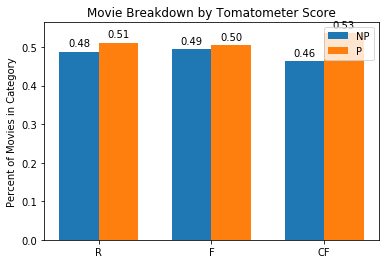

In [14]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['R', 'F', 'CF']
profitable_movies = [
    distinct_df[(distinct_df.tomatometer_status == 'Rotten') & (distinct_df.WorldwideGross > distinct_df.ProductionBudget)].shape[0] / distinct_df[(distinct_df.tomatometer_status == 'Rotten')].shape[0],
    distinct_df[(distinct_df.tomatometer_status == 'Fresh') & (distinct_df.WorldwideGross > distinct_df.ProductionBudget)].shape[0] / distinct_df[(distinct_df.tomatometer_status == 'Fresh')].shape[0],
    distinct_df[(distinct_df.tomatometer_status == 'Certified Fresh') & (distinct_df.WorldwideGross > distinct_df.ProductionBudget)].shape[0] / distinct_df[(distinct_df.tomatometer_status == 'Certified Fresh')].shape[0],
]
unprofitable_movies = [
    distinct_df[(distinct_df.tomatometer_status == 'Rotten') & (distinct_df.WorldwideGross <= distinct_df.ProductionBudget)].shape[0] / distinct_df[(distinct_df.tomatometer_status == 'Rotten')].shape[0],
    distinct_df[(distinct_df.tomatometer_status == 'Fresh') & (distinct_df.WorldwideGross <= distinct_df.ProductionBudget)].shape[0] / distinct_df[(distinct_df.tomatometer_status == 'Fresh')].shape[0],
    distinct_df[(distinct_df.tomatometer_status == 'Certified Fresh') & (distinct_df.WorldwideGross <= distinct_df.ProductionBudget)].shape[0] / distinct_df[(distinct_df.tomatometer_status == 'Certified Fresh')].shape[0],
]



x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, unprofitable_movies, width, label='NP')
rects2 = ax.bar(x + width/2, profitable_movies, width, label='P')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percent of Movies in Category')
ax.set_title('Movie Breakdown by Tomatometer Score')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height)[0:4],
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

# fig.tight_layout()

plt.savefig('movies_by_tomatometer.png', dpi=300)

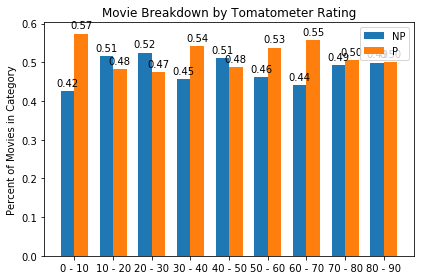

In [15]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FormatStrFormatter

buckets = []
for i in range(0, 90, 10):
    buckets.append((i, i + 10))

labels = ['{} - {}'.format(bucket[0], bucket[1]) for bucket in buckets]

profitable_movies = [
    distinct_df[(bucket[0] < distinct_df.tomatometer_rating) & (distinct_df.tomatometer_rating < bucket[1]) & (distinct_df.WorldwideGross > distinct_df.ProductionBudget)].shape[0] /
    distinct_df[(bucket[0] < distinct_df.tomatometer_rating) & (distinct_df.tomatometer_rating < bucket[1])].shape[0]
    for bucket in buckets
]
unprofitable_movies = [
    distinct_df[(bucket[0] < distinct_df.tomatometer_rating) & (distinct_df.tomatometer_rating < bucket[1]) & (distinct_df.WorldwideGross <= distinct_df.ProductionBudget)].shape[0] /
    distinct_df[(bucket[0] < distinct_df.tomatometer_rating) & (distinct_df.tomatometer_rating < bucket[1])].shape[0]
    for bucket in buckets
]



x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, unprofitable_movies, width, label='NP')
rects2 = ax.bar(x + width/2, profitable_movies, width, label='P')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percent of Movies in Category')
ax.set_title('Movie Breakdown by Tomatometer Rating')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height)[0:4],
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.savefig('movies_by_tomatometer_rating.png', dpi=300)

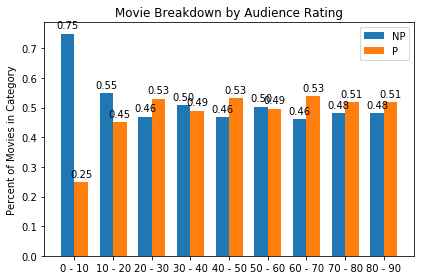

In [16]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FormatStrFormatter

buckets = []
for i in range(0, 90, 10):
    buckets.append((i, i + 10))

labels = ['{} - {}'.format(bucket[0], bucket[1]) for bucket in buckets]

profitable_movies = [
    distinct_df[(bucket[0] < distinct_df.audience_rating) & (distinct_df.audience_rating < bucket[1]) & (distinct_df.WorldwideGross > distinct_df.ProductionBudget)].shape[0] /
    distinct_df[(bucket[0] < distinct_df.audience_rating) & (distinct_df.audience_rating < bucket[1])].shape[0]
    for bucket in buckets
]
unprofitable_movies = [
    distinct_df[(bucket[0] < distinct_df.audience_rating) & (distinct_df.audience_rating < bucket[1]) & (distinct_df.WorldwideGross <= distinct_df.ProductionBudget)].shape[0] /
    distinct_df[(bucket[0] < distinct_df.audience_rating) & (distinct_df.audience_rating < bucket[1])].shape[0]
    for bucket in buckets
]



x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, unprofitable_movies, width, label='NP')
rects2 = ax.bar(x + width/2, profitable_movies, width, label='P')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percent of Movies in Category')
ax.set_title('Movie Breakdown by Audience Rating')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height)[0:4],
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.savefig('movies_by_audience_rating.png', dpi=300)

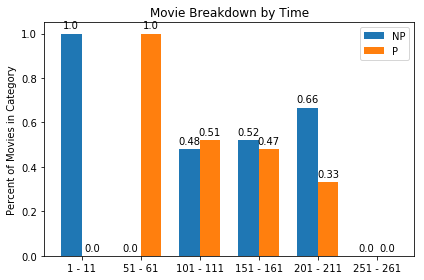

In [64]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FormatStrFormatter

buckets = []
for i in range(1, 300, 50):
    buckets.append((i, i + 10))

labels = ['{} - {}'.format(bucket[0], bucket[1]) for bucket in buckets]

profitable_movies = [
    distinct_df[(bucket[0] < distinct_df.runtime_in_minutes) & (distinct_df.runtime_in_minutes < bucket[1]) & (distinct_df.WorldwideGross > distinct_df.ProductionBudget)].shape[0] /
    max(distinct_df[(bucket[0] < distinct_df.runtime_in_minutes) & (distinct_df.runtime_in_minutes < bucket[1])].shape[0], 1)
    for bucket in buckets
]
unprofitable_movies = [
    distinct_df[(bucket[0] < distinct_df.runtime_in_minutes) & (distinct_df.runtime_in_minutes < bucket[1]) & (distinct_df.WorldwideGross <= distinct_df.ProductionBudget)].shape[0] /
    max(distinct_df[(bucket[0] < distinct_df.runtime_in_minutes) & (distinct_df.runtime_in_minutes < bucket[1])].shape[0], 1)
    for bucket in buckets
]



x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, unprofitable_movies, width, label='NP')
rects2 = ax.bar(x + width/2, profitable_movies, width, label='P')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percent of Movies in Category')
ax.set_title('Movie Breakdown by Time')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height)[0:4],
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

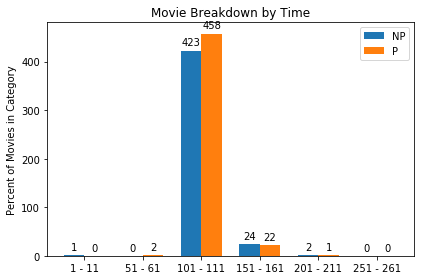

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FormatStrFormatter

buckets = []
for i in range(1, 300, 50):
    buckets.append((i, i + 10))

labels = ['{} - {}'.format(bucket[0], bucket[1]) for bucket in buckets]

profitable_movies = [
    distinct_df[(bucket[0] < distinct_df.runtime_in_minutes) & (distinct_df.runtime_in_minutes < bucket[1]) & (distinct_df.WorldwideGross > distinct_df.ProductionBudget)].shape[0]
    for bucket in buckets
]
unprofitable_movies = [
    distinct_df[(bucket[0] < distinct_df.runtime_in_minutes) & (distinct_df.runtime_in_minutes < bucket[1]) & (distinct_df.WorldwideGross <= distinct_df.ProductionBudget)].shape[0]
    for bucket in buckets
]



x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, unprofitable_movies, width, label='NP')
rects2 = ax.bar(x + width/2, profitable_movies, width, label='P')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percent of Movies in Category')
ax.set_title('Movie Breakdown by Time')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height)[0:4],
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

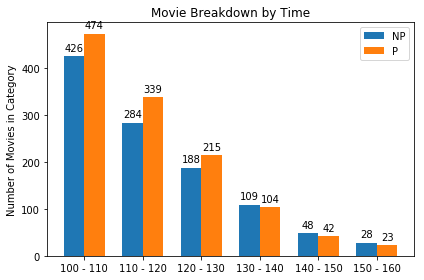

In [18]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FormatStrFormatter

buckets = []
for i in range(100, 160, 10):
    buckets.append((i, i + 10))

labels = ['{} - {}'.format(bucket[0], bucket[1]) for bucket in buckets]

profitable_movies = [
    distinct_df[(bucket[0] < distinct_df.runtime_in_minutes) & (distinct_df.runtime_in_minutes < bucket[1]) & (distinct_df.WorldwideGross > distinct_df.ProductionBudget)].shape[0]
    for bucket in buckets
]
unprofitable_movies = [
    distinct_df[(bucket[0] < distinct_df.runtime_in_minutes) & (distinct_df.runtime_in_minutes < bucket[1]) & (distinct_df.WorldwideGross <= distinct_df.ProductionBudget)].shape[0]
    for bucket in buckets
]



x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, unprofitable_movies, width, label='NP')
rects2 = ax.bar(x + width/2, profitable_movies, width, label='P')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Movies in Category')
ax.set_title('Movie Breakdown by Time')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height)[0:4],
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.savefig('movies_by_time.png', dpi=300)

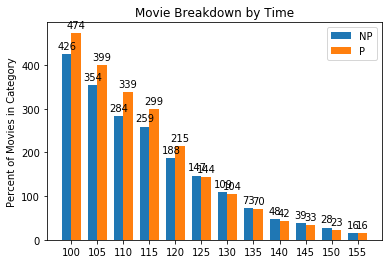

In [10]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FormatStrFormatter

buckets = []
for i in range(100, 160, 5):
    buckets.append((i, i + 10))

labels = ['{}'.format(bucket[0], bucket[1]) for bucket in buckets]

profitable_movies = [
    distinct_df[(bucket[0] < distinct_df.runtime_in_minutes) & (distinct_df.runtime_in_minutes < bucket[1]) & (distinct_df.WorldwideGross > distinct_df.ProductionBudget)].shape[0]
    for bucket in buckets
]
unprofitable_movies = [
    distinct_df[(bucket[0] < distinct_df.runtime_in_minutes) & (distinct_df.runtime_in_minutes < bucket[1]) & (distinct_df.WorldwideGross <= distinct_df.ProductionBudget)].shape[0]
    for bucket in buckets
]



x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, unprofitable_movies, width, label='NP')
rects2 = ax.bar(x + width/2, profitable_movies, width, label='P')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percent of Movies in Category')
ax.set_title('Movie Breakdown by Time')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height)[0:4],
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

plt.show()

In [3]:
distinct_df = pd.read_csv('distinct_df_filled_na.csv')

In [16]:
labels = [director for director in distinct_df['directors']]
profitable_movies = [
    distinct_df[(distinct_df.directors == label) & (distinct_df.WorldwideGross > distinct_df.ProductionBudget)].shape[0] / 
    distinct_df[(distinct_df.directors == label)].shape[0]
    for label in labels
]

nan

In [10]:
df = pd.read_csv('data_parsed_contains_word_features.csv')

In [24]:
df['director']

,Unnamed: 0,DomesticGross,IsProfitable,ProductionBudget,ReleaseDate,Unnamed: 0.1,WorldwideGross,audience_count,audience_fresh_critics_count,audience_rating,...,rating,ratio,rotten_tomatoes_link,runtime_in_minutes,studio_name,tomatometer_count,tomatometer_rating,tomatometer_status,writers,


In [4]:
distinct_df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'rotten_tomatoes_link',
       'movie_title', 'movie_info', 'critics_consensus', 'poster_image_url',
       'rating', 'genre', 'directors', 'writers', 'cast', 'in_theaters_date',
       'on_streaming_date', 'runtime_in_minutes', 'studio_name',
       'tomatometer_status', 'tomatometer_rating', 'tomatometer_count',
       'audience_status', 'audience_rating', 'audience_count',
       'audience_top_critics_count', 'audience_fresh_critics_count',
       'audience_rotten_critics_count', 'ratio', ' ', 'ReleaseDate',
       'ProductionBudget', 'DomesticGross', 'WorldwideGross'],
      dtype='object')